# **LOAD DATA**

As done in previous attempt

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import itertools
import numpy as np
import os
import shutil
import random
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/flowers_new/archive.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/tmp/dataset')
zip_ref.close()

In [ ]:
base_direct = '/tmp/dataset/Flowers_Dataset_Revised/Flowers_Dataset_Revised/newFlowers/'
daisy_direct = base_direct + 'daisy/'
dandelion_direct = base_direct + 'dandelion/'
rose_direct = base_direct + 'rose/'
sunflower_direct = base_direct + 'sunflower/'
tulip_direct = base_direct + 'tulip/'

train_direct = '/tmp/dataset/flowers/train/'
valid_direct = '/tmp/dataset/flowers/valid/'
test_direct = '/tmp/dataset/flowers/test/'

In [ ]:
print('all daisy images: ', len(os.listdir(daisy_direct)))
print('all dandelion images: ', len(os.listdir(dandelion_direct)))
print('all rose images: ', len(os.listdir(rose_direct)))
print('all sunflower images: ', len(os.listdir(sunflower_direct)))
print('all tuplip images: ', len(os.listdir(tulip_direct)))

all daisy images:  746
all dandelion images:  1028
all rose images:  728
all sunflower images:  698
all tuplip images:  935


In [ ]:
folder_names = [ 'daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
dataset_direct='/tmp/dataset/flowers/'
dataset_direct_train = dataset_direct + 'train/'
dataset_direct_valid = dataset_direct + 'valid/'
dataset_direct_test = dataset_direct + 'test/'

In [ ]:
import os, shutil
def clear_directory(folder):
#folder = '/tmp/dataset/flowers/train/tulip'
  for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [ ]:
if os.path.exists(dataset_direct_train):
  for name in folder_names:
    clear_directory(dataset_direct_train+name)
  for name in folder_names:
    os.rmdir(dataset_direct_train+name)

  os.rmdir(dataset_direct+'train')

if os.path.exists(dataset_direct_valid):
  for name in folder_names:
    clear_directory(dataset_direct_valid+name)
  for name in folder_names:
    os.rmdir(dataset_direct_valid+name)
  os.rmdir(dataset_direct+'valid')

if os.path.exists(dataset_direct_test):
  for name in folder_names:
    clear_directory(dataset_direct_test+name)
  for name in folder_names:
    os.rmdir(dataset_direct_test+name)
  os.rmdir(dataset_direct+'test')




In [ ]:
if not os.path.exists('/tmp/dataset/flowers'):
    os.makedirs('/tmp/dataset/flowers')

os.chdir('/tmp/dataset/flowers')
if os.path.isdir('train/daisy') is False:
  os.makedirs('train/daisy')
  os.makedirs('train/dandelion')
  os.makedirs('train/rose')
  os.makedirs('train/sunflower')
  os.makedirs('train/tulip')
  
  os.makedirs('valid/daisy')
  os.makedirs('valid/dandelion')
  os.makedirs('valid/rose')
  os.makedirs('valid/sunflower')
  os.makedirs('valid/tulip')

  os.makedirs('test/daisy')
  os.makedirs('test/dandelion')
  os.makedirs('test/rose')
  os.makedirs('test/sunflower')
  os.makedirs('test/tulip')



In [ ]:
folder_names[:5]

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
for flower_type in folder_names[:5]:
  img_list = os.listdir(base_direct+flower_type)
  for img in random.sample(img_list, round(len(os.listdir(base_direct+flower_type))*0.7)):
    shutil.move(base_direct+flower_type+'/'+img, train_direct+flower_type)
  img_list = os.listdir(base_direct+flower_type)
  for img in random.sample(img_list, round(len(os.listdir(base_direct+flower_type))*0.66666)):
    shutil.move(base_direct+flower_type+'/'+img, valid_direct+flower_type)
  
  source_dir = base_direct+flower_type +'/'
  target_dir = test_direct+flower_type +'/'
  file_names = os.listdir(source_dir)

  for file_name in file_names:
    shutil.move(source_dir+file_name, target_dir)

In [ ]:
print('train daisy images: ', len(os.listdir(train_direct+'daisy')))
print('valid daisy images: ', len(os.listdir(valid_direct+'daisy')))
print('test daisy images: ', len(os.listdir(test_direct+'daisy')))

train daisy images:  522
valid daisy images:  149
test daisy images:  75


In [ ]:
images = random.sample(os.listdir(valid_direct+'rose'),20)

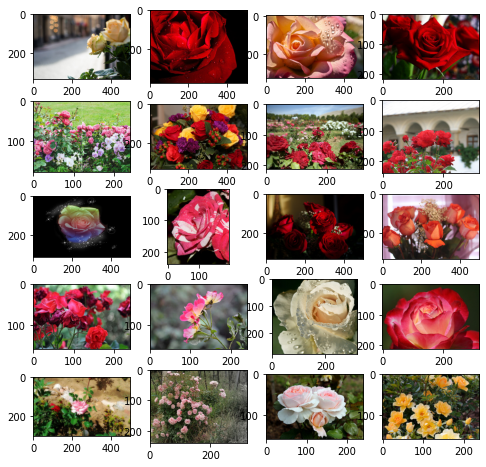

In [ ]:
import cv2
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(0, columns*rows ):
    IMG = cv2.imread(valid_direct+'rose/'+images[i])
    RGB_img = cv2.cvtColor(IMG, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(RGB_img)
plt.show()

# **Images Preperation - Preprocessed Data**

In [ ]:
batch_size = 8
num_of_epochs = 30

In [ ]:
train_prep = ImageDataGenerator(rescale=1/255)
valid_prep = ImageDataGenerator(rescale=1/255)
test_prep = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train_prep.flow_from_directory(
    dataset_direct_train,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse'
)

valid_dataset = valid_prep.flow_from_directory(
    dataset_direct_valid,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse'
)

test_prep = ImageDataGenerator(rescale=1/255)

test_dataset = test_prep.flow_from_directory(
    dataset_direct_test,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 2895 images belonging to 5 classes.
Found 825 images belonging to 5 classes.
Found 415 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

# **Show Preprocessed Data**

In [ ]:
imgs, labels = next(train_dataset)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed 
def plotImages(images_arr):
  fig, axes = plt.subplots(1, batch_size, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

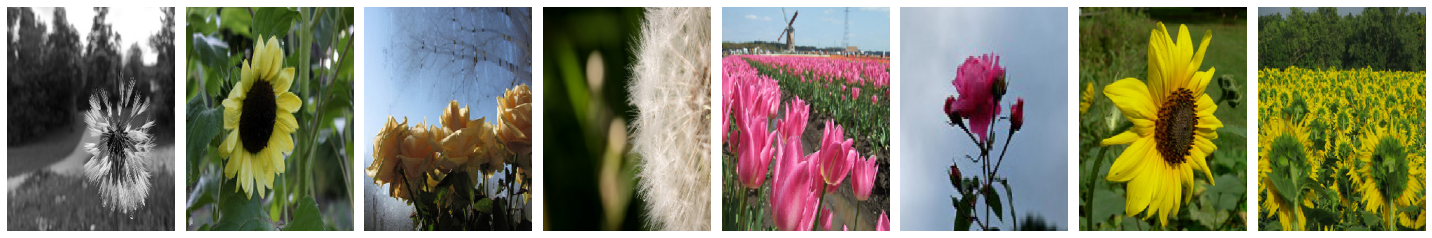

[1. 3. 2. 1. 4. 2. 3. 3.]


In [ ]:
plotImages(imgs)
print(labels)

# **Confusion Matrix - function**

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix
  Normalization can be applied by setting 'normalization=True'
  """
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title),
  plt.colorbar(),
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('COnfusion matrix, without normalization')

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# **CNN Model 4**

This time we will change number of filters in all layers - we'll doubble the, and add Early Stop feature - which will stop training if in few last epochs the accuracy won't increase

In [ ]:
model_cnn_4 = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(320,240,3)),
    layers.MaxPool2D(2,2),
    #
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Flatten(),
    ##
    layers.Dense(256, activation='relu'),
    ##
    layers.Dense(32, activation='relu'),
    ##
    layers.Dense(5,activation='softmax')
])

In [ ]:
model_cnn_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 238, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 119, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 157, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 58, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 136192)            0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model_cnn_4.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

EarlyStop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
history_cnn_4 = model_cnn_4.fit(train_dataset,
                                epochs=num_of_epochs,
                                validation_data=valid_dataset,
                                callbacks=[EarlyStop])

Epoch 1/30
362/362 [==============================] - 57s 73ms/step - loss: 1.4679 - accuracy: 0.3655 - val_loss: 1.1181 - val_accuracy: 0.5503
Epoch 2/30
362/362 [==============================] - 26s 71ms/step - loss: 1.0569 - accuracy: 0.5796 - val_loss: 1.0669 - val_accuracy: 0.5927
Epoch 3/30
362/362 [==============================] - 26s 71ms/step - loss: 0.8495 - accuracy: 0.6839 - val_loss: 0.9281 - val_accuracy: 0.6521
Epoch 4/30
362/362 [==============================] - 26s 72ms/step - loss: 0.5480 - accuracy: 0.7941 - val_loss: 1.1742 - val_accuracy: 0.6376
Epoch 5/30
362/362 [==============================] - 26s 71ms/step - loss: 0.2498 - accuracy: 0.9064 - val_loss: 1.6546 - val_accuracy: 0.6315
Epoch 6/30
362/362 [==============================] - 25s 70ms/step - loss: 0.1452 - accuracy: 0.9561 - val_loss: 1.7742 - val_accuracy: 0.6376
Epoch 7/30
362/362 [==============================] - 25s 70ms/step - loss: 0.0930 - accuracy: 0.9727 - val_loss: 1.8771 - val_accuracy:

# **Predict Model 4**

In [ ]:
predictions_cnn_4 = model_cnn_4.predict(x=test_dataset)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_dataset.classes, y_pred=np.argmax(predictions_cnn_4 , axis=-1))

COnfusion matrix, without normalization
[[52  9  6  8  0]
 [19 69  2  8  5]
 [ 9  6 44  0 14]
 [ 3  6  1 56  4]
 [10  6 23  7 48]]


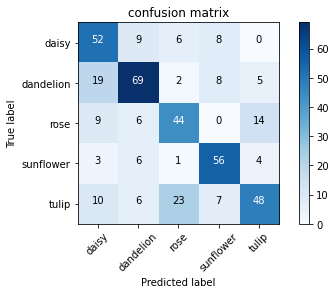

In [ ]:
cm_plot_labels = folder_names
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')

# **CNN Model 5**

In [ ]:
model_cnn_5 = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(320,240,3)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Flatten(),
    ##
    layers.Dense(512, activation='relu'),
    ##
    layers.Dense(64, activation='relu'),
    ##
    layers.Dense(5,activation='softmax')
])

In [ ]:
model_cnn_5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 316, 236, 32)      2432      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 312, 232, 32)      25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 156, 116, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 154, 114, 64)      18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 152, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 76, 56, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 74, 54, 128)      

In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping

model_cnn_5.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

EarlyStop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
history_cnn_5 = model_cnn_5.fit(train_dataset,
                                epochs=num_of_epochs,
                                validation_data=valid_dataset,
                                callbacks=[EarlyStop])

Epoch 1/30
362/362 [==============================] - 80s 213ms/step - loss: 1.4297 - accuracy: 0.3731 - val_loss: 1.2980 - val_accuracy: 0.4279
Epoch 2/30
362/362 [==============================] - 74s 205ms/step - loss: 1.3163 - accuracy: 0.4373 - val_loss: 1.2439 - val_accuracy: 0.4545
Epoch 3/30
362/362 [==============================] - 74s 204ms/step - loss: 1.2126 - accuracy: 0.4846 - val_loss: 1.2774 - val_accuracy: 0.4873
Epoch 4/30
362/362 [==============================] - 74s 204ms/step - loss: 1.0844 - accuracy: 0.5416 - val_loss: 1.2629 - val_accuracy: 0.4909
Epoch 5/30
362/362 [==============================] - 74s 205ms/step - loss: 0.8943 - accuracy: 0.6363 - val_loss: 1.6236 - val_accuracy: 0.4958
Epoch 6/30
362/362 [==============================] - 74s 205ms/step - loss: 0.7705 - accuracy: 0.7071 - val_loss: 1.7492 - val_accuracy: 0.4764
Epoch 7/30
362/362 [==============================] - 74s 204ms/step - loss: 0.5722 - accuracy: 0.7731 - val_loss: 2.3723 - val_ac

# **Predict Model 5**

COnfusion matrix, without normalization
[[12 34  5 20  4]
 [ 3 74  5 18  3]
 [ 1  8 34  4 26]
 [ 5 14  5 37  9]
 [ 5  7 28  4 50]]


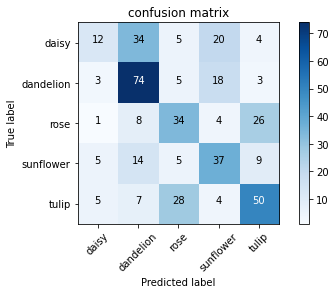

In [ ]:
predictions_cnn_5 = model_cnn_5.predict(x=test_dataset)

cm_5 = confusion_matrix(y_true=test_dataset.classes, y_pred=np.argmax(predictions_cnn_5 , axis=-1))

cm_plot_labels = folder_names
plot_confusion_matrix(cm=cm_5, classes=cm_plot_labels, title='confusion matrix')

# **CNN Model 6**

In [ ]:
model_cnn_6 = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(320,240,3)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.25),
    #
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.25),
    #
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.25),
    #
    layers.Flatten(),
    ##
    layers.Dense(512, activation='relu'),
    ##
    layers.Dense(64, activation='relu'),
    ##
    layers.Dense(5,activation='softmax')
])

In [ ]:
model_cnn_6.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 316, 236, 32)      2432      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 312, 232, 32)      25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 156, 116, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 156, 116, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 154, 114, 64)      18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 152, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 76, 56, 64)       

In [ ]:
model_cnn_6.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

EarlyStop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [ ]:
history_cnn_6 = model_cnn_6.fit(train_dataset,
                                epochs=num_of_epochs,
                                validation_data=valid_dataset,
                                callbacks=[EarlyStop])

Epoch 1/30
362/362 [==============================] - 77s 209ms/step - loss: 1.6676 - accuracy: 0.2421 - val_loss: 1.6001 - val_accuracy: 0.2485
Epoch 2/30
362/362 [==============================] - 76s 209ms/step - loss: 1.5991 - accuracy: 0.2487 - val_loss: 1.5974 - val_accuracy: 0.2485
Epoch 3/30
362/362 [==============================] - 75s 207ms/step - loss: 1.5980 - accuracy: 0.2487 - val_loss: 1.5973 - val_accuracy: 0.2485
Epoch 4/30
362/362 [==============================] - 75s 208ms/step - loss: 1.5982 - accuracy: 0.2487 - val_loss: 1.5973 - val_accuracy: 0.2485
Epoch 5/30
362/362 [==============================] - 75s 207ms/step - loss: 1.5979 - accuracy: 0.2487 - val_loss: 1.5973 - val_accuracy: 0.2485
Epoch 6/30
362/362 [==============================] - 75s 208ms/step - loss: 1.5982 - accuracy: 0.2487 - val_loss: 1.5972 - val_accuracy: 0.2485
Epoch 7/30
362/362 [==============================] - 75s 206ms/step - loss: 1.6017 - accuracy: 0.2470 - val_loss: 1.5973 - val_ac

# **Predict Model 6**

COnfusion matrix, without normalization
[[  0  75   0   0   0]
 [  0 103   0   0   0]
 [  0  73   0   0   0]
 [  0  70   0   0   0]
 [  0  94   0   0   0]]


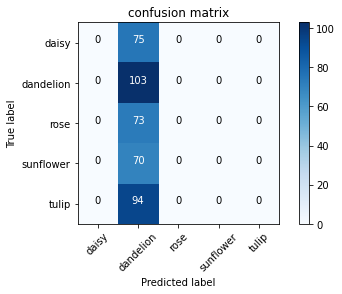

In [ ]:
predictions_cnn_6 = model_cnn_6.predict(x=test_dataset)

cm_6 = confusion_matrix(y_true=test_dataset.classes, y_pred=np.argmax(predictions_cnn_6 , axis=-1))

cm_plot_labels = folder_names
plot_confusion_matrix(cm=cm_6, classes=cm_plot_labels, title='confusion matrix')

# **CNN Model 7**

In [ ]:
model_cnn_7 = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(320,240,3)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Flatten(),
    ##
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    ##
    layers.Dense(5,activation='softmax')
])

In [ ]:
model_cnn_7.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 316, 236, 32)      2432      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 312, 232, 32)      25632     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 156, 116, 32)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 154, 114, 64)      18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 152, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 76, 56, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 74, 54, 128)      

In [ ]:
model_cnn_7.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

EarlyStop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history_cnn_7 = model_cnn_7.fit(train_dataset,
                                epochs=num_of_epochs,
                                validation_data=valid_dataset,
                                callbacks=[EarlyStop])

Epoch 1/30
362/362 [==============================] - 69s 190ms/step - loss: 1.4996 - accuracy: 0.3261 - val_loss: 1.2835 - val_accuracy: 0.5176
Epoch 2/30
362/362 [==============================] - 68s 187ms/step - loss: 1.4437 - accuracy: 0.3644 - val_loss: 1.3232 - val_accuracy: 0.4206
Epoch 3/30
362/362 [==============================] - 68s 187ms/step - loss: 1.3152 - accuracy: 0.4556 - val_loss: 1.2640 - val_accuracy: 0.4667
Epoch 4/30
362/362 [==============================] - 68s 187ms/step - loss: 1.2112 - accuracy: 0.5064 - val_loss: 1.2853 - val_accuracy: 0.4412
Epoch 5/30
362/362 [==============================] - 68s 187ms/step - loss: 1.0271 - accuracy: 0.5872 - val_loss: 1.1528 - val_accuracy: 0.5091
Epoch 6/30
362/362 [==============================] - 68s 187ms/step - loss: 0.7658 - accuracy: 0.6981 - val_loss: 1.2089 - val_accuracy: 0.5091
Epoch 7/30
362/362 [==============================] - 68s 187ms/step - loss: 0.5744 - accuracy: 0.7793 - val_loss: 1.2447 - val_ac

# **Predict Model 7**

COnfusion matrix, without normalization
[[37 15 11  4  8]
 [ 8 63  8 11 13]
 [ 5 15 27  4 22]
 [ 9 12  3 37  9]
 [ 6 15 22  7 44]]


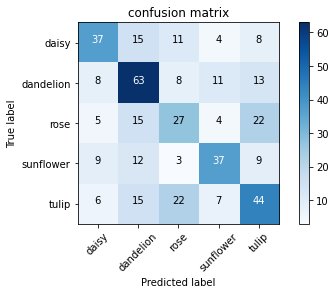

In [ ]:
predictions_cnn_7 = model_cnn_7.predict(x=test_dataset)

cm_7 = confusion_matrix(y_true=test_dataset.classes, y_pred=np.argmax(predictions_cnn_7 , axis=-1))

cm_plot_labels = folder_names
plot_confusion_matrix(cm=cm_7, classes=cm_plot_labels, title='confusion matrix')